# Aplicando funciones lambda a un dataframe
- Las funciones Lambda son funciones anónimas (no tienen declaración formal).
- Pueden tomar cualquier número de argumentos, pero solamente tener una expresión.
- Son anónimas, no necesitan de declaración, o statements internos como 'return', 'pass', etc.
- Muy productivas y eficientes.
- Las vamos a utilizar durante toda la vida de programación con Python.
- Comando apply.

In [1]:
# Nuevo Dataframe
import pandas as pd

clase = [('Jorge', 22, 'MX'),
        ('Anita', 31, 'MX'),
        ('Raul', 16, 'BR'),
        ('Simon', 41, 'BR'),
        ('Diego', 33, 'PA'),
        ('Jorge', 35, 'PA'),
        ('Almendra', 35, 'CO'),
        ('Mary', 37, 'CO'),
        ('Peter', 40, 'EC'),
        ('Andrés', 48, 'EC')]

df_clase = pd.DataFrame(clase, columns=['Nombre', 'Edad', 'País'],)

# Buscando si la edad es par o impar
df_clase['Par-Impar'] = df_clase['Edad'].apply(lambda x: 'Impar' if int(x) % 2 else 'Par')
# En este caso, Edad se envía como parámetro a la función lambda, que busca si Edad / 2 es entero o no.
df_clase

,Nombre,Edad,País,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,Impar
2,Raul,16,BR,Par
3,Simon,41,BR,Impar
4,Diego,33,PA,Impar
5,Jorge,35,PA,Impar
6,Almendra,35,CO,Impar
7,Mary,37,CO,Impar
8,Peter,40,EC,Par
9,Andrés,48,EC,Par


In [2]:
df_clase.groupby('Par-Impar').count()['Nombre']

Par-Impar
Impar    6
Par      4
Name: Nombre, dtype: int64

<Axes: xlabel='Par-Impar'>

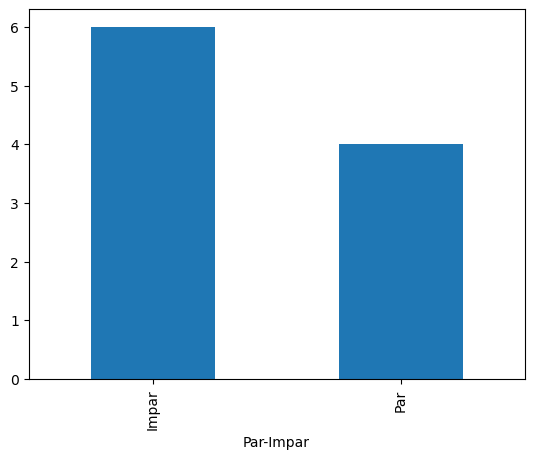

In [3]:
df_clase.groupby('Par-Impar').count()['Nombre'].plot.bar()

In [4]:
# Ejemplo lambda 2: Descuento del 10% para mayores de 37 años
df_clase['Dcto'] = df_clase['Edad'].apply(lambda x: 0.1 if x > 37 else 0.0)
df_clase

,Nombre,Edad,País,Par-Impar,Dcto
0,Jorge,22,MX,Par,0.0
1,Anita,31,MX,Impar,0.0
2,Raul,16,BR,Par,0.0
3,Simon,41,BR,Impar,0.1
4,Diego,33,PA,Impar,0.0
5,Jorge,35,PA,Impar,0.0
6,Almendra,35,CO,Impar,0.0
7,Mary,37,CO,Impar,0.0
8,Peter,40,EC,Par,0.1
9,Andrés,48,EC,Par,0.1


In [5]:
# Ejemplo lambda 3: Zona horaria
# Referencia: https://pynative.com/list-all-timezones-in-python/#:~:text=))%20%23%20Output%20440-,Get%20Timezone%20of%20a%20Any%20Country,the%20timezone%20of%20any%20country
import pytz

df_clase['ZonaHoraria'] = df_clase['País'].apply(lambda x: pytz.country_timezones[x])
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/..."
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/..."
2,Raul,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta..."
3,Simon,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta..."
4,Diego,33,PA,Impar,0.0,[America/Panama]
5,Jorge,35,PA,Impar,0.0,[America/Panama]
6,Almendra,35,CO,Impar,0.0,[America/Bogota]
7,Mary,37,CO,Impar,0.0,[America/Bogota]
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]"
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]"


In [6]:
# Finalmente, se obtiene la capital de cada país, en el caso de que se tengan que generar comunicados o envíos
# físicos. Primero, se instala la librería - pip install countryinfo

# Se va a utilizar la función CountryInfo(country).capital(), donde country es el país.
# Se obtendrá country como el país desde pytz
df_clase['NombrePaís'] = df_clase['País'].apply(lambda x: pytz.country_names[x])
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
2,Raul,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
3,Simon,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta...",Brazil
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [8]:
!pip install countryinfo

  Obtaining dependency information for countryinfo from https://files.pythonhosted.org/packages/55/16/9fa55d43ae8ee969b75b3977d45f6640bb6c0e52d9912af11593e112a3cc/countryinfo-0.1.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 2.6 MB/s eta 0:00:00a 0:00:01


In [10]:
# Se importa la librería CountryInfo
# Luego, con base en el nombre del país, se obtiene su capital
from countryinfo import CountryInfo
df_clase['Capital'] = df_clase['NombrePaís'].apply(lambda x: CountryInfo(x).capital())
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
2,Raul,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
3,Simon,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama,Panama City
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama,Panama City
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


In [11]:
# Se abre un curso en portugués, por lo que los alumnos de Brasil tienen que salir del listado actual
index_br = df_clase[(df_clase['País'] == 'BR')].index
# Corresponde a los registros 2 y 3
index_br

Index([2, 3], dtype='int64')

In [12]:
# Elimina los registros correspondientes
df_clase.drop(index_br, inplace=True)
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama,Panama City
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama,Panama City
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


In [13]:
# Agrupamiento por país
print(df_clase.groupby('País').size())

País
CO    2
EC    2
MX    2
PA    2
dtype: int64


In [20]:
# Agrupamiento por país
print(df_clase[['País', 'Edad', 'Dcto']].groupby('País').mean()['Edad'])

País
CO    36.0
EC    44.0
MX    26.5
PA    34.0
Name: Edad, dtype: float64


## Bonus Track: Un ejemplo simple de visualización

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


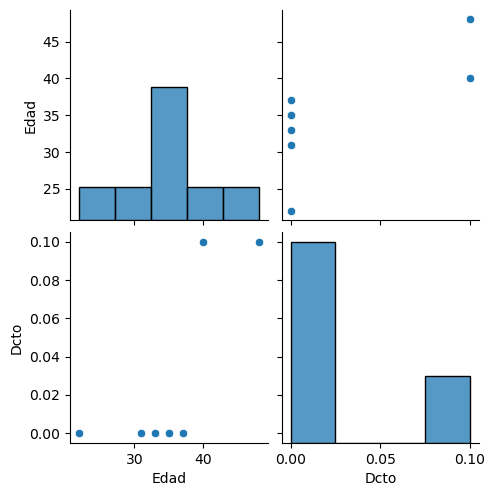

In [21]:
import seaborn as sns

# Gráfico tipo pairplot
sns.pairplot(df_clase)

### Código anterior

In [22]:
import numpy as np

df = pd.read_csv('netflix_titles_2.csv')
# Se elimina la columna con .drop()
df.drop('Unnamed: 0', axis='columns', inplace=True)

df_movies = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min')]
df_movies2 = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min') & (df['duration_num'] > 60)]

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


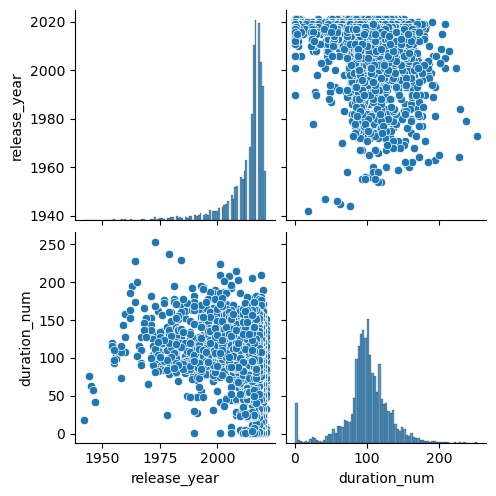

In [23]:
# Eliminar filas con duplicados y nulos
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Visualizar
sns.pairplot(df)

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


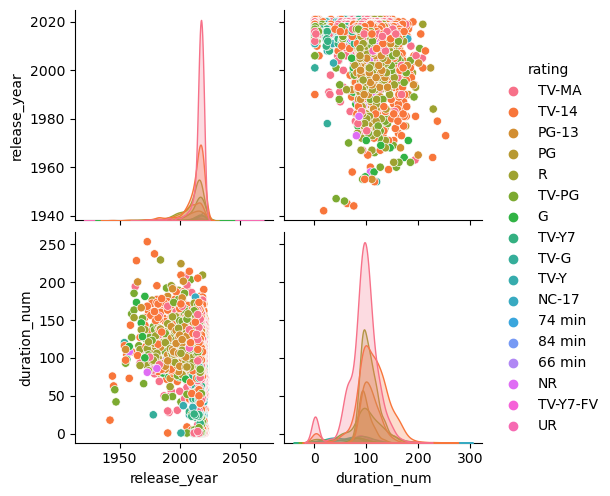

In [24]:
# Visualize pairplot of df
sns.pairplot(df, hue='rating')

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


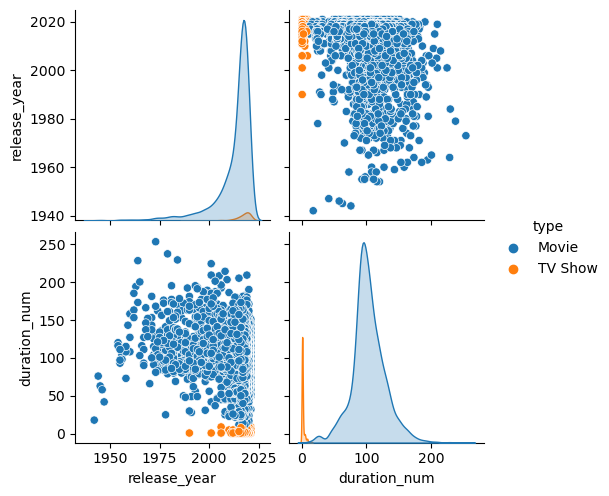

In [25]:
# Visualize pairplot of df
sns.pairplot(df, hue='type')

# Wrap Up
- En esta lección se han visto funciones avanzadas de dataframes en la parte estadística.
- Operaciones básicas con totales del dataframe (total de horas).
- Agrupamientos por categoría.
- Eliminación y Renombramiento de Columnas.
- Generación de un dataframe y combinación de 2 dataframes.
- Funciones lambda aplicadas a dataframes: par/impar, zona horaria, descuento, capital.
- Condiciones para filtrado y manejo de registros.
- Agrupaciones básicas.
- Introducción a la visualización.